<a href="https://colab.research.google.com/github/humzkhan/Adaptive_learning/blob/main/Thesis_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from skopt import gp_minimize
from skopt.plots import plot_convergence

# Example black-box function (toy): we want to minimize this function
def black_box_function(x):
    """ A simple test function: f(x) = x^2 * sin(x)
        x is a list or array, but we use x[0] because it's 1D.
    """
    val = (x[0]**2) * np.sin(x[0])
    return val


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Approve the authentication prompts as needed

Mounted at /content/drive


In [4]:

# Step 2: Define the base path to your folder
import os

base_path = '/content/drive/MyDrive/Thesis_Updated/singleLayerData'
# If your Drive is mounted as "My Drive" (with a space), use:
# base_path = '/content/drive/My Drive/Thesis/Data Files/Single layer samples'

# Step 3: Recursively find all files (CSV and Excel) in the base folder
import glob
import pandas as pd

# Dictionary to store DataFrames
all_dfs = {}

# Find all CSV and Excel files
csv_files = glob.glob(os.path.join(base_path, '**', '*.csv'), recursive=True)
xls_files = glob.glob(os.path.join(base_path, '**', '*.xls'), recursive=True)
xlsx_files = glob.glob(os.path.join(base_path, '**', '*.xlsx'), recursive=True)
excel_files = xls_files + xlsx_files

print(f"Found {len(csv_files)} CSV files and {len(excel_files)} Excel files.")

# Step 4: Load all files into pandas DataFrames
# Load CSV files (skip first 14 lines of the header)
for file_path in csv_files:
    try:
        relative_path = os.path.relpath(file_path, base_path)
        print(f"Loading CSV: {relative_path} (Skipping first 14 lines)")
        df = pd.read_csv(file_path, skiprows=14)  # Skip first 14 rows
        all_dfs[relative_path] = df
    except Exception as e:
        print(f"Error reading CSV {file_path}: {e}")

# Load Excel files
for file_path in excel_files:
    try:
        relative_path = os.path.relpath(file_path, base_path)
        print(f"Loading Excel: {relative_path}")
        df = pd.read_excel(file_path)
        all_dfs[relative_path] = df
    except Exception as e:
        print(f"Error reading Excel {file_path}: {e}")

# Step 5: Verify loaded DataFrames
print("\nLoaded the following files (relative paths):")
for rel_path in all_dfs:
    print(f"  -> {rel_path}")
    print(all_dfs[rel_path].head())  # Show the first few rows for each DataFrame


Found 37 CSV files and 0 Excel files.
Loading CSV: 4%/PBT/4%-PBT-2.0mm.csv (Skipping first 14 lines)
Loading CSV: 5%/PBT/5%-PBT-2.8mm-B.csv (Skipping first 14 lines)
Loading CSV: 5%/PBT/5%-PBT-2.0mm.csv (Skipping first 14 lines)
Loading CSV: 5%/PBT/5%-PBT-2.8mm-A.csv (Skipping first 14 lines)
Loading CSV: 5%/ABS/5%-ABS-2.8mm-C.csv (Skipping first 14 lines)
Loading CSV: 5%/ABS/5%-ABS-2.8mm-B.csv (Skipping first 14 lines)
Loading CSV: 5%/ABS/5%-ABS-2.8mm-A.csv (Skipping first 14 lines)
Loading CSV: 3%/ABS/3%-ABS-1.1mm-B-ambient.csv (Skipping first 14 lines)
Loading CSV: 3%/ABS/3%-ABS-2.8mm-C.csv (Skipping first 14 lines)
Loading CSV: 3%/ABS/3%-ABS-1.1mm-A-ambient.csv (Skipping first 14 lines)
Loading CSV: 3%/ABS/3%-ABS-1.1mm-A-compressed.csv (Skipping first 14 lines)
Loading CSV: 3%/ABS/3%-ABS-1.1mm-B-compressed.csv (Skipping first 14 lines)
Loading CSV: 3%/ABS/3%-ABS-2.8mm-B.csv (Skipping first 14 lines)
Loading CSV: 3%/ABS/3%-ABS-1.1mm-B-quenched.csv (Skipping first 14 lines)
Loading C

In [5]:
def check_headers(dataframes, required_headers):
    """
    Check each DataFrame for the presence of required headers.

    Parameters:
    - dataframes (dict): Dictionary where keys are file paths and values are DataFrames.
    - required_headers (list): List of required headers to check for.

    Returns:
    - dict: Dictionary with filenames as keys and missing headers as values.
    """
    missing_headers = {}

    for file_path, df in dataframes.items():
        # Normalize the column names: lowercase and remove spaces
        normalized_columns = [col.lower().replace(" ", "") for col in df.columns]

        # Find missing headers
        file_missing = [header.lower().replace(" ", "") for header in required_headers if header.lower().replace(" ", "") not in normalized_columns]

        if file_missing:
            missing_headers[file_path] = file_missing

    return missing_headers

# Define required headers
required_headers = ['A', 'R', 'T', 'SEr', 'SEa', 'SEt']

# Check headers for all DataFrames
missing_headers_info = check_headers(all_dfs, required_headers)

# Display results
if missing_headers_info:
    print("\nFiles missing required headers:")
    for file, missing in missing_headers_info.items():
        print(f"File: {file}")
        print(f"Missing headers: {missing}")
else:
    print("\nAll files have the required headers.")



Files missing required headers:
File: 5%/ABS/5%-ABS-2.8mm-C.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 5%/ABS/5%-ABS-2.8mm-B.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 5%/ABS/5%-ABS-2.8mm-A.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 3%/ABS/3%-ABS-1.1mm-B-ambient.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 3%/ABS/3%-ABS-2.8mm-C.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 3%/ABS/3%-ABS-1.1mm-A-ambient.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 3%/ABS/3%-ABS-1.1mm-A-compressed.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 3%/ABS/3%-ABS-1.1mm-B-compressed.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 3%/ABS/3%-ABS-2.8mm-B.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 3%/ABS/3%-ABS-1.1mm-B-quenched.csv
Missing headers: ['a', 'r', 't', 'ser', 'sea', 'set']
File: 3%/ABS/3%-ABS-2.8mm-A.csv
Missing headers: ['a', 'r', 

In [6]:
import numpy as np

def add_missing_headers_flexible(dataframes):
    """
    Add missing headers to DataFrames by searching flexibly for S11 and S21 in column headers.

    Parameters:
    - dataframes (dict): Dictionary where keys are file paths and values are DataFrames.

    Returns:
    - dict: Updated dictionary of DataFrames with missing headers added.
    """
    updated_files = []  # To track files that were updated

    for file_path, df in dataframes.items():
        # Normalize column names for consistent matching
        df.columns = [col.lower().replace(" ", "").replace("(linm)", "") for col in df.columns]

        # Flag to track if any update was made
        updated = False

        # Attempt to locate 'S11' and 'S21' columns
        s11_col = next((col for col in df.columns if "s11" in col), None)
        s21_col = next((col for col in df.columns if "s21" in col), None)

        # Check and calculate each required column
        if 'r' not in df.columns:
            if s11_col:
                df['r'] = df[s11_col] ** 2
                updated = True
            else:
                print(f"Missing 'S11' column for calculating 'R' in {file_path}")
                continue

        if 't' not in df.columns:
            if s21_col:
                df['t'] = df[s21_col] ** 2
                updated = True
            else:
                print(f"Missing 'S21' column for calculating 'T' in {file_path}")
                continue

        if 'a' not in df.columns:
            if 'r' in df.columns and 't' in df.columns:
                df['a'] = 1 - df['r'] - df['t']
                updated = True
            else:
                print(f"Cannot calculate 'A' in {file_path} due to missing 'R' or 'T'")
                continue

        if 'ser' not in df.columns:
            if 'r' in df.columns:
                df['ser'] = -10 * np.log10(1 - df['r'])
                updated = True
            else:
                print(f"Cannot calculate 'SEr' in {file_path} due to missing 'R'")
                continue

        if 'set' not in df.columns:
            if 't' in df.columns:
                df['set'] = -10 * np.log10(df['t'])
                updated = True
            else:
                print(f"Cannot calculate 'SEt' in {file_path} due to missing 'T'")
                continue

        if 'sea' not in df.columns:
            if 'set' in df.columns and 'ser' in df.columns:
                df['sea'] = df['set'] - df['ser']
                updated = True
            else:
                print(f"Cannot calculate 'SEa' in {file_path} due to missing 'SEt' or 'SEr'")
                continue

        # If updated, track the file
        if updated:
            updated_files.append(file_path)

        # Update DataFrame in the dictionary
        dataframes[file_path] = df

    # Print updated files
    for file_path in updated_files:
        print(f"\nUpdated {file_path}:")
        print(dataframes[file_path].head(1))  # Print only the first row for preview

    return dataframes

# Apply the updated function to all DataFrames
updated_dfs = add_missing_headers_flexible(all_dfs)



Updated 5%/ABS/5%-ABS-2.8mm-C.csv:
   frequency(hz)   tr2s11    tr3s21  tr1data(e')  tr4data(e'')  tr5data(u')  \
0   1.240000e+10  0.87814  0.042179     6.811813      2.641842          1.0   

   tr6data(u'')         r         t        a       ser        set        sea  
0           0.0  0.771131  0.001779  0.22709  6.404125  27.498031  21.093906  

Updated 5%/ABS/5%-ABS-2.8mm-B.csv:
   frequency(hz)    tr2s11    tr3s21  tr1data(e')  tr4data(e'')  tr5data(u')  \
0   1.240000e+10  0.845358  0.052452     6.828651       3.05671          1.0   

   tr6data(u'')        r         t         a       ser        set        sea  
0           0.0  0.71463  0.002751  0.282618  5.445922  25.604749  20.158827  

Updated 5%/ABS/5%-ABS-2.8mm-A.csv:
   frequency(hz)    tr2s11    tr3s21  tr1data(e')  tr4data(e'')  tr5data(u')  \
0   1.240000e+10  0.856208  0.037372     6.844234      2.925287          1.0   

   tr6data(u'')         r         t         a       ser       set        sea  
0           0.0 

In [7]:
import pandas as pd

def standardize_files(dataframes):
    """
    Standardize the headers and clean up the data for all provided dataframes.

    Parameters:
    - dataframes (dict): Dictionary where keys are file paths and values are DataFrames.

    Returns:
    - dict: Updated dictionary with standardized DataFrames.
    """
    standardized_headers = [
        "frequency(Hz)", "Tr 1  Data(e')", "Tr 2  Data(e'')", "Tr 3  Data(u')",
        "Tr 4  Data(u'')", "Tr 5  S11(LinM)", "Tr 6  S21(LinM)", "R", "T", "A", "SEr", "Sea", "Set"
    ]
    standardized_dfs = {}

    for file_path, df in dataframes.items():
        # Standardize column names (remove spacing, normalize to lowercase for matching)
        df.columns = [col.lower().strip().replace(" ", "").replace("(linm)", "") for col in df.columns]

        # Map the standardized headers to the current column names
        column_mapping = {}
        for std_col in standardized_headers:
            std_col_lower = std_col.lower().replace(" ", "").replace("(linm)", "")
            match = next((col for col in df.columns if col == std_col_lower), None)
            if match:
                column_mapping[match] = std_col

        # Apply the mapping to the DataFrame
        df = df.rename(columns=column_mapping)

        # Retain only the standardized headers
        df = df[[col for col in standardized_headers if col in df.columns]]

        # Filter rows to keep only frequency values within the specified range (12.4 GHz to 18 GHz)
        freq_col = "frequency(Hz)"
        if freq_col in df.columns:
            df = df[(df[freq_col] >= 12.4e9) & (df[freq_col] <= 18e9)]

        # Save the standardized DataFrame
        standardized_dfs[file_path] = df

    return standardized_dfs


# Apply the standardization function to the dataframes
standardized_dfs = standardize_files(all_dfs)

# Check the results for a few files
for file_path, df in standardized_dfs.items():
    print(f"\nStandardized {file_path}:")
    #print(df.head())



Standardized 4%/PBT/4%-PBT-2.0mm.csv:

Standardized 5%/PBT/5%-PBT-2.8mm-B.csv:

Standardized 5%/PBT/5%-PBT-2.0mm.csv:

Standardized 5%/PBT/5%-PBT-2.8mm-A.csv:

Standardized 5%/ABS/5%-ABS-2.8mm-C.csv:

Standardized 5%/ABS/5%-ABS-2.8mm-B.csv:

Standardized 5%/ABS/5%-ABS-2.8mm-A.csv:

Standardized 3%/ABS/3%-ABS-1.1mm-B-ambient.csv:

Standardized 3%/ABS/3%-ABS-2.8mm-C.csv:

Standardized 3%/ABS/3%-ABS-1.1mm-A-ambient.csv:

Standardized 3%/ABS/3%-ABS-1.1mm-A-compressed.csv:

Standardized 3%/ABS/3%-ABS-1.1mm-B-compressed.csv:

Standardized 3%/ABS/3%-ABS-2.8mm-B.csv:

Standardized 3%/ABS/3%-ABS-1.1mm-B-quenched.csv:

Standardized 3%/ABS/3%-ABS-2.8mm-A.csv:

Standardized 3%/ABS/3%-ABS-1.1mm-A-quenched.csv:

Standardized 3%/PBT/3%-PBT-2.8mm-A.csv:

Standardized 3%/PBT/3%-PBT-2.8mm-B.csv:

Standardized 3%/PBT/3%-PBT-2.0mm.csv:

Standardized 1%/ABS/1%-ABS-2.8mm-C.csv:

Standardized 1%/ABS/1%-ABS-2.8mm-A.csv:

Standardized 1%/ABS/1%-ABS-2.8mm-B.csv:

Standardized 1%/PBT/1%-PBT-1.0mm.csv:

Standard

In [8]:
def remove_footer_data(dataframes):
    """
    Remove footer data from DataFrames by splitting off rows starting at the first null value.

    Parameters:
    - dataframes (dict): Dictionary where keys are file paths and values are DataFrames.

    Returns:
    - dict: Updated dictionary of DataFrames with footer data removed.
    """
    updated_dataframes = {}

    for file_path, df in dataframes.items():
        # Find the first index where a null value appears
        null_index = df.isnull().any(axis=1).idxmax() if df.isnull().any().any() else None

        if null_index is not None and null_index > 0:
            # Keep only the rows before the first null
            df_cleaned = df.iloc[:null_index]
            print(f"Footer data removed from {file_path} starting at index {null_index}")
        else:
            df_cleaned = df  # No null values, keep the DataFrame as is
            print(f"No footer data found in {file_path}")

        # Update the dictionary with cleaned DataFrame
        updated_dataframes[file_path] = df_cleaned

    return updated_dataframes

# Apply the function to remove footer data
cleaned_dfs = remove_footer_data(standardized_dfs)


No footer data found in 4%/PBT/4%-PBT-2.0mm.csv
No footer data found in 5%/PBT/5%-PBT-2.8mm-B.csv
No footer data found in 5%/PBT/5%-PBT-2.0mm.csv
No footer data found in 5%/PBT/5%-PBT-2.8mm-A.csv
No footer data found in 5%/ABS/5%-ABS-2.8mm-C.csv
No footer data found in 5%/ABS/5%-ABS-2.8mm-B.csv
No footer data found in 5%/ABS/5%-ABS-2.8mm-A.csv
No footer data found in 3%/ABS/3%-ABS-1.1mm-B-ambient.csv
No footer data found in 3%/ABS/3%-ABS-2.8mm-C.csv
No footer data found in 3%/ABS/3%-ABS-1.1mm-A-ambient.csv
No footer data found in 3%/ABS/3%-ABS-1.1mm-A-compressed.csv
No footer data found in 3%/ABS/3%-ABS-1.1mm-B-compressed.csv
No footer data found in 3%/ABS/3%-ABS-2.8mm-B.csv
No footer data found in 3%/ABS/3%-ABS-1.1mm-B-quenched.csv
No footer data found in 3%/ABS/3%-ABS-2.8mm-A.csv
No footer data found in 3%/ABS/3%-ABS-1.1mm-A-quenched.csv
No footer data found in 3%/PBT/3%-PBT-2.8mm-A.csv
No footer data found in 3%/PBT/3%-PBT-2.8mm-B.csv
No footer data found in 3%/PBT/3%-PBT-2.0mm.csv


In [9]:
def inspect_footer(dataframes, n=5):
    """
    Inspect the bottom rows of each DataFrame to check for footer data.

    Parameters:
    - dataframes (dict): Dictionary where keys are file paths and values are DataFrames.
    - n (int): Number of bottom rows to display from each DataFrame.

    Returns:
    - None: Prints the bottom rows of each DataFrame.
    """
    for file_path, df in dataframes.items():
        print(f"\nBottom {n} rows of {file_path}:")
        print(df.tail(n))

# Inspect the bottom rows of the standardized DataFrames
inspect_footer(cleaned_dfs, n=5)



Bottom 5 rows of 4%/PBT/4%-PBT-2.0mm.csv:
    frequency(Hz)      R      T      A    SEr     Sea     Set
95   1.777374e+10  0.646  0.002  0.352  4.513  23.638  28.151
96   1.783030e+10  0.637  0.002  0.361  4.406  23.805  28.212
97   1.788687e+10  0.638  0.002  0.361  4.408  23.824  28.232
98   1.794343e+10  0.640  0.001  0.359  4.436  23.804  28.239
99   1.800000e+10  0.633  0.001  0.366  4.351  23.939  28.291

Bottom 5 rows of 5%/PBT/5%-PBT-2.8mm-B.csv:
    frequency(Hz)  Tr 1  Data(e')  Tr 2  Data(e'')  Tr 3  Data(u')  \
95   1.777374e+10            81.8             71.1            2.11   
96   1.783030e+10            79.7             73.3            2.08   
97   1.788687e+10            82.4             71.4            2.07   
98   1.794343e+10            78.8             74.0            2.05   
99   1.800000e+10            80.3             71.0            2.08   

    Tr 4  Data(u'')  Tr 5  S11(LinM) Tr 6  S21(LinM)      R      T      A  \
95           -0.803            0.819      

In [10]:
def inspect_cleaned_dfs(dataframes):
    """
    Inspect the structure and contents of the cleaned_dfs dictionary.

    Parameters:
    - dataframes (dict): Dictionary of cleaned DataFrames.

    Returns:
    - None: Prints summary information about each DataFrame.
    """
    print(f"Total DataFrames: {len(dataframes)}")
    for file_path, df in dataframes.items():
        print("\n---")
        print(f"File Path: {file_path}")
        print(f"DataFrame Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print(f"First Few Rows:\n{df.head()}")
        print(f"Null Values:\n{df.isnull().sum()}")
        print(f"Column Types:\n{df.dtypes}")
        print("---")

# Inspect the cleaned_dfs dictionary
inspect_cleaned_dfs(cleaned_dfs)


Total DataFrames: 37

---
File Path: 4%/PBT/4%-PBT-2.0mm.csv
DataFrame Shape: (100, 7)
Columns: ['frequency(Hz)', 'R', 'T', 'A', 'SEr', 'Sea', 'Set']
First Few Rows:
   frequency(Hz)      R      T      A    SEr     Sea     Set
0   1.240000e+10  0.752  0.002  0.246  6.058  20.823  26.881
1   1.245657e+10  0.747  0.002  0.251  5.974  20.900  26.875
2   1.251313e+10  0.748  0.002  0.250  5.990  20.896  26.886
3   1.256970e+10  0.749  0.002  0.249  6.011  20.861  26.872
4   1.262626e+10  0.745  0.002  0.253  5.928  20.959  26.887
Null Values:
frequency(Hz)    0
R                0
T                0
A                0
SEr              0
Sea              0
Set              0
dtype: int64
Column Types:
frequency(Hz)    float64
R                float64
T                float64
A                float64
SEr              float64
Sea              float64
Set              float64
dtype: object
---

---
File Path: 5%/PBT/5%-PBT-2.8mm-B.csv
DataFrame Shape: (100, 13)
Columns: ['frequency(Hz)', "Tr 1 

In [11]:
import pandas as pd
import numpy as np

def create_thesis_dataframe(dataframes):
    """
    Create a single thesis dataframe by processing multiple dataframes.

    Parameters:
    - dataframes (dict): Dictionary where keys are file paths and values are DataFrames.

    Returns:
    - pd.DataFrame: Thesis dataframe with all rows appended.
    """
    thesis_data = []  # List to store rows for the thesis dataframe

    for file_path, df in dataframes.items():
        # Call the thesis_row function for each dataframe
        thesis_row_data = thesis_row(file_path, df)
        if thesis_row_data:  # Only append if the row is successfully created
            thesis_data.append(thesis_row_data)

    # Convert the list of rows into a DataFrame
    thesis_df = pd.DataFrame(thesis_data)
    return thesis_df

def thesis_row(file_path, df):
    """
    Extract features for a single dataframe and return as a dictionary (row).

    Parameters:
    - file_path (str): Path to the file.
    - df (pd.DataFrame): Dataframe to process.

    Returns:
    - dict: Extracted features as a dictionary.
    """
    # Extract file properties
    import re
    match = re.search(r'(\d+)%/(ABS|PBT)/(\d+)%-(ABS|PBT)-([\d.]+)mm', file_path)
    if not match:
        print(f"Filename format not recognized: {file_path}")
        return None

    cnt_pct = int(match.group(1))
    material = match.group(2)
    thickness = float(match.group(5))

    # Normalize column names
    df.columns = [col.strip().lower() for col in df.columns]

    # Create a row with features
    row = {
        'filename': file_path,
        'cnt_pct': cnt_pct,
        'material': material,
        'thickness': thickness,
        'mean_a': df['a'].mean() if 'a' in df.columns else np.nan,
        'max_a': df['a'].max() if 'a' in df.columns else np.nan,
        'skew_a': df['a'].skew() if 'a' in df.columns else np.nan,
        'kurt_a': df['a'].kurt() if 'a' in df.columns else np.nan,
        'mean_r': df['r'].mean() if 'r' in df.columns else np.nan,
        'mean_t': df['t'].mean() if 't' in df.columns else np.nan,
        '%_a90': (df['a'] >= 0.9).mean() * 100 if 'a' in df.columns else np.nan,
        'f_start_a90': df.loc[df['a'] >= 0.9, 'frequency(hz)'].min() if 'a' in df.columns and not df.loc[df['a'] >= 0.9].empty else np.nan,
        'f_end_a90': df.loc[df['a'] >= 0.9, 'frequency(hz)'].max() if 'a' in df.columns and not df.loc[df['a'] >= 0.9].empty else np.nan,
        'bw_a90': df.loc[df['a'] >= 0.9, 'frequency(hz)'].max() - df.loc[df['a'] >= 0.9, 'frequency(hz)'].min()
        if 'a' in df.columns and not df.loc[df['a'] >= 0.9].empty else np.nan,
        '%_r10': (df['r'] < 0.1).mean() * 100 if 'r' in df.columns else np.nan,
        'f_start_r10': df.loc[df['r'] < 0.1, 'frequency(hz)'].min() if 'r' in df.columns and not df.loc[df['r'] < 0.1].empty else np.nan,
        'f_end_r10': df.loc[df['r'] < 0.1, 'frequency(hz)'].max() if 'r' in df.columns and not df.loc[df['r'] < 0.1].empty else np.nan,
        '%_t2': (df['t'] < 0.02).mean() * 100 if 't' in df.columns else np.nan,
        'f_start_t2': df.loc[df['t'] < 0.02, 'frequency(hz)'].min() if 't' in df.columns and not df.loc[df['t'] < 0.02].empty else np.nan,
        'f_end_t2': df.loc[df['t'] < 0.02, 'frequency(hz)'].max() if 't' in df.columns and not df.loc[df['t'] < 0.02].empty else np.nan,
    }
    return row

# Example usage:
thesis_df = create_thesis_dataframe(cleaned_dfs)

# Save or inspect the dataframe
print(thesis_df)
# Optionally save it to a file:
# thesis_df.to_csv("thesis_data.csv", index=False)


                                filename  cnt_pct material  thickness  \
0                4%/PBT/4%-PBT-2.0mm.csv        4      PBT        2.0   
1              5%/PBT/5%-PBT-2.8mm-B.csv        5      PBT        2.8   
2                5%/PBT/5%-PBT-2.0mm.csv        5      PBT        2.0   
3              5%/PBT/5%-PBT-2.8mm-A.csv        5      PBT        2.8   
4              5%/ABS/5%-ABS-2.8mm-C.csv        5      ABS        2.8   
5              5%/ABS/5%-ABS-2.8mm-B.csv        5      ABS        2.8   
6              5%/ABS/5%-ABS-2.8mm-A.csv        5      ABS        2.8   
7      3%/ABS/3%-ABS-1.1mm-B-ambient.csv        3      ABS        1.1   
8              3%/ABS/3%-ABS-2.8mm-C.csv        3      ABS        2.8   
9      3%/ABS/3%-ABS-1.1mm-A-ambient.csv        3      ABS        1.1   
10  3%/ABS/3%-ABS-1.1mm-A-compressed.csv        3      ABS        1.1   
11  3%/ABS/3%-ABS-1.1mm-B-compressed.csv        3      ABS        1.1   
12             3%/ABS/3%-ABS-2.8mm-B.csv        3  

In [12]:
def thesis_row_with_alternative_features(file_path, df):
    """
    Extract features for a single dataframe with alternative features for modeling.

    Parameters:
    - file_path (str): Path to the file.
    - df (pd.DataFrame): Dataframe to process.

    Returns:
    - dict: Extracted features as a dictionary.
    """
    import re
    match = re.search(r'(\d+)%/(ABS|PBT)/(\d+)%-(ABS|PBT)-([\d.]+)mm', file_path)
    if not match:
        print(f"Filename format not recognized: {file_path}")
        return None

    cnt_pct = int(match.group(1))
    material = match.group(2)
    thickness = float(match.group(5))

    # Normalize column names
    df.columns = [col.strip().lower() for col in df.columns]

    # Create a row with features
    row = {
        'filename': file_path,
        'cnt_pct': cnt_pct,
        'material': material,
        'thickness': thickness,
        'mean_a': df['a'].mean() if 'a' in df.columns else np.nan,
        'max_a': df['a'].max() if 'a' in df.columns else np.nan,
        'std_a': df['a'].std() if 'a' in df.columns else np.nan,
        'range_a': (df['a'].max() - df['a'].min()) if 'a' in df.columns else np.nan,
        'weighted_mean_a': (df['a'] * df['frequency(hz)']).sum() / df['frequency(hz)'].sum()
        if 'a' in df.columns else np.nan,
        'mean_r': df['r'].mean() if 'r' in df.columns else np.nan,
        'std_r': df['r'].std() if 'r' in df.columns else np.nan,
        'mean_t': df['t'].mean() if 't' in df.columns else np.nan,
        'std_t': df['t'].std() if 't' in df.columns else np.nan,
        'mean_a_to_r_ratio': (df['a'].mean() / df['r'].mean()) if 'a' in df.columns and 'r' in df.columns else np.nan,
        'gradient_a': np.gradient(df['a']).mean() if 'a' in df.columns else np.nan,
        'gradient_r': np.gradient(df['r']).mean() if 'r' in df.columns else np.nan,
        'gradient_t': np.gradient(df['t']).mean() if 't' in df.columns else np.nan,
        'performance_score': (
            0.5 * df['a'].mean() - 0.3 * df['r'].mean() + 0.2 * df['t'].mean()
        ) if 'a' in df.columns and 'r' in df.columns and 't' in df.columns else np.nan,
    }
    return row

def create_thesis_dataframe_with_alternative_features(dataframes):
    """
    Create a single thesis dataframe by processing multiple dataframes with alternative features.

    Parameters:
    - dataframes (dict): Dictionary where keys are file paths and values are DataFrames.

    Returns:
    - pd.DataFrame: Thesis dataframe with all rows appended.
    """
    thesis_data = []
    for file_path, df in dataframes.items():
        thesis_row_data = thesis_row_with_alternative_features(file_path, df)
        if thesis_row_data:
            thesis_data.append(thesis_row_data)

    return pd.DataFrame(thesis_data)

# Example usage:
thesis_df = create_thesis_dataframe_with_alternative_features(cleaned_dfs)

# Inspect the updated dataframe
print(thesis_df)


                                filename  cnt_pct material  thickness  \
0                4%/PBT/4%-PBT-2.0mm.csv        4      PBT        2.0   
1              5%/PBT/5%-PBT-2.8mm-B.csv        5      PBT        2.8   
2                5%/PBT/5%-PBT-2.0mm.csv        5      PBT        2.0   
3              5%/PBT/5%-PBT-2.8mm-A.csv        5      PBT        2.8   
4              5%/ABS/5%-ABS-2.8mm-C.csv        5      ABS        2.8   
5              5%/ABS/5%-ABS-2.8mm-B.csv        5      ABS        2.8   
6              5%/ABS/5%-ABS-2.8mm-A.csv        5      ABS        2.8   
7      3%/ABS/3%-ABS-1.1mm-B-ambient.csv        3      ABS        1.1   
8              3%/ABS/3%-ABS-2.8mm-C.csv        3      ABS        2.8   
9      3%/ABS/3%-ABS-1.1mm-A-ambient.csv        3      ABS        1.1   
10  3%/ABS/3%-ABS-1.1mm-A-compressed.csv        3      ABS        1.1   
11  3%/ABS/3%-ABS-1.1mm-B-compressed.csv        3      ABS        1.1   
12             3%/ABS/3%-ABS-2.8mm-B.csv        3  

Visualizations

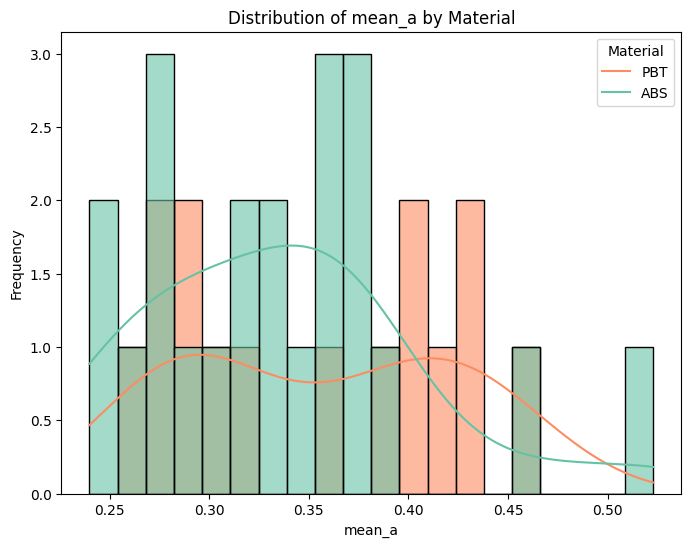

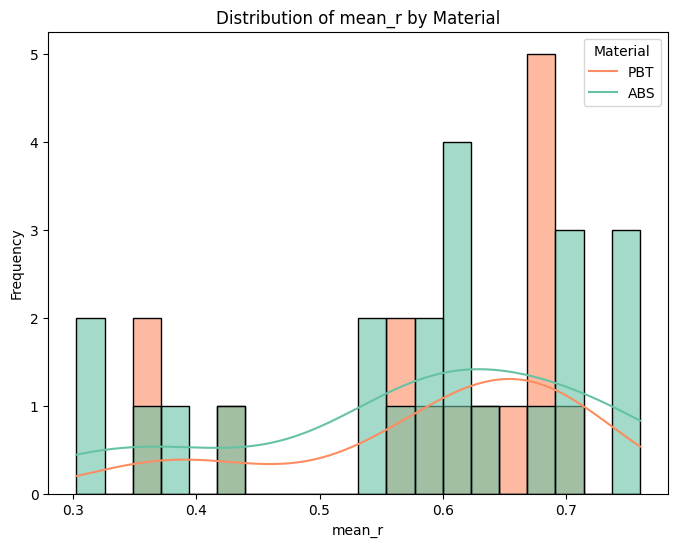

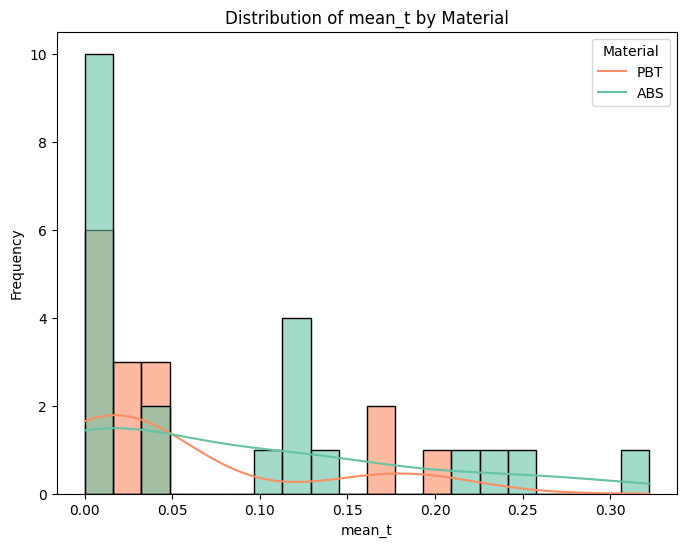

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in ['mean_a', 'mean_r', 'mean_t']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=thesis_df, x=feature, hue='material', kde=True, bins=20, palette='Set2', alpha=0.6)
    plt.title(f'Distribution of {feature} by Material')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Material', labels=['PBT', 'ABS'])
    plt.show()


<ipython-input-14-e3c17c7718f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=thesis_df, x='material', y=feature, palette='Set3')


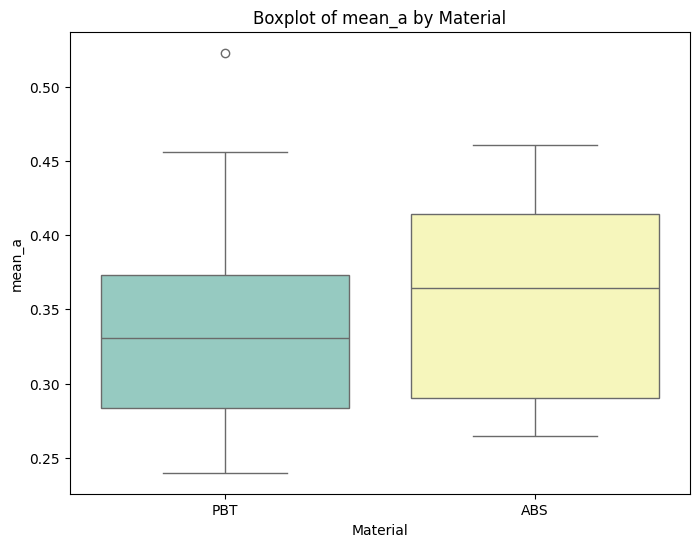

<ipython-input-14-e3c17c7718f1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=thesis_df, x='material', y=feature, palette='Set3')


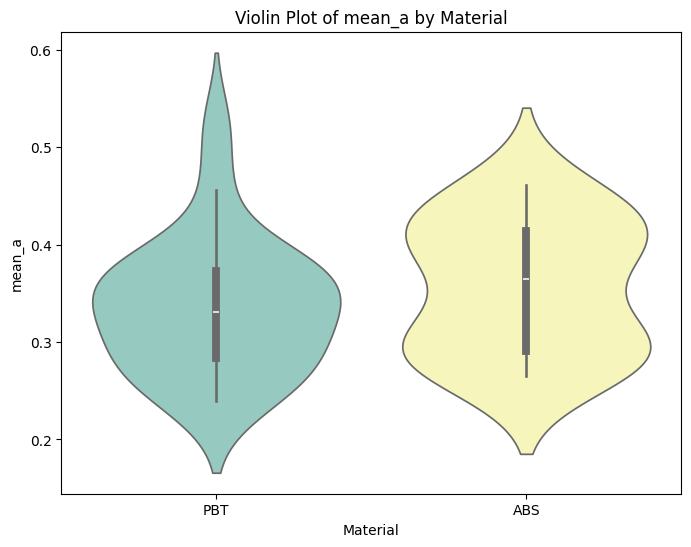

<ipython-input-14-e3c17c7718f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=thesis_df, x='material', y=feature, palette='Set3')


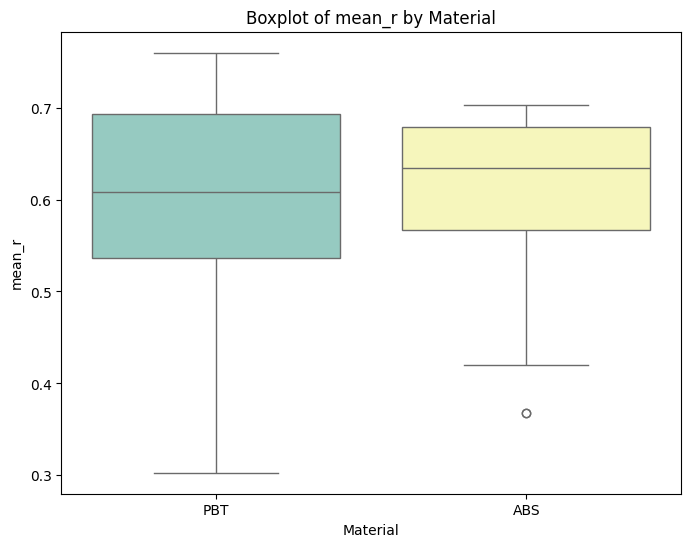

<ipython-input-14-e3c17c7718f1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=thesis_df, x='material', y=feature, palette='Set3')


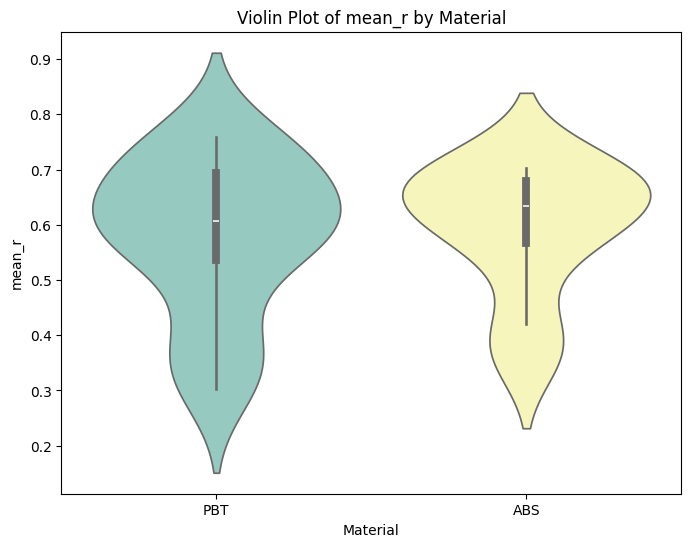

<ipython-input-14-e3c17c7718f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=thesis_df, x='material', y=feature, palette='Set3')


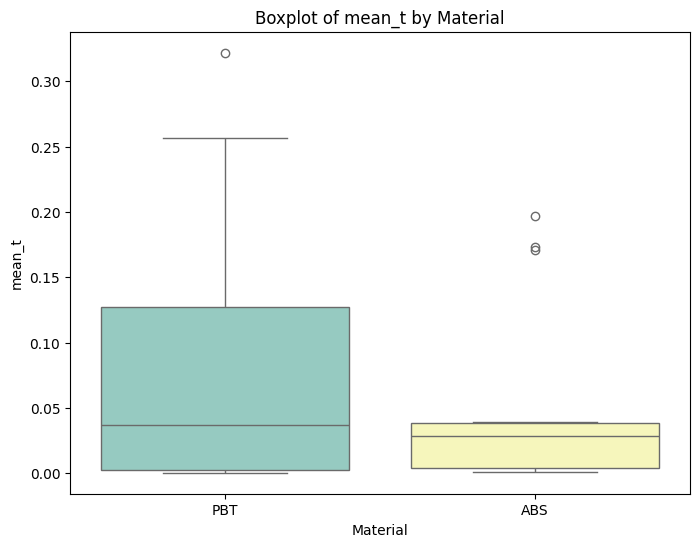

<ipython-input-14-e3c17c7718f1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=thesis_df, x='material', y=feature, palette='Set3')


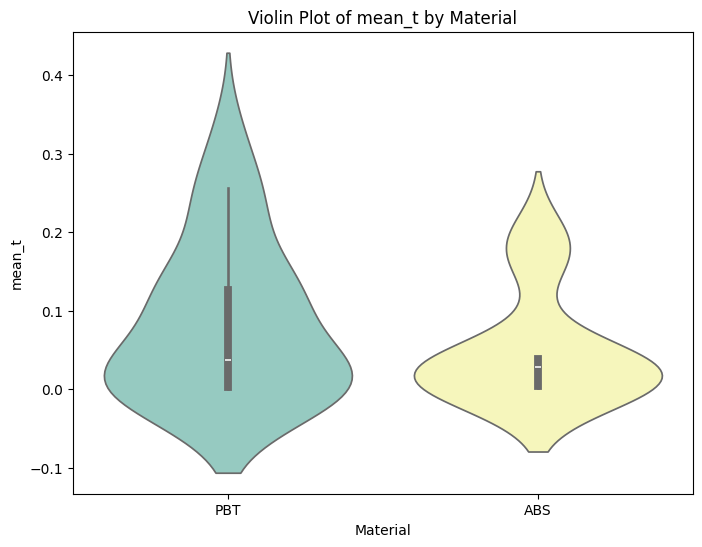

In [14]:
for feature in ['mean_a', 'mean_r', 'mean_t']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=thesis_df, x='material', y=feature, palette='Set3')
    plt.title(f'Boxplot of {feature} by Material')
    plt.xlabel('Material')
    plt.ylabel(feature)
    plt.show()

    # Violin plot for more detail
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=thesis_df, x='material', y=feature, palette='Set3')
    plt.title(f'Violin Plot of {feature} by Material')
    plt.xlabel('Material')
    plt.ylabel(feature)
    plt.show()


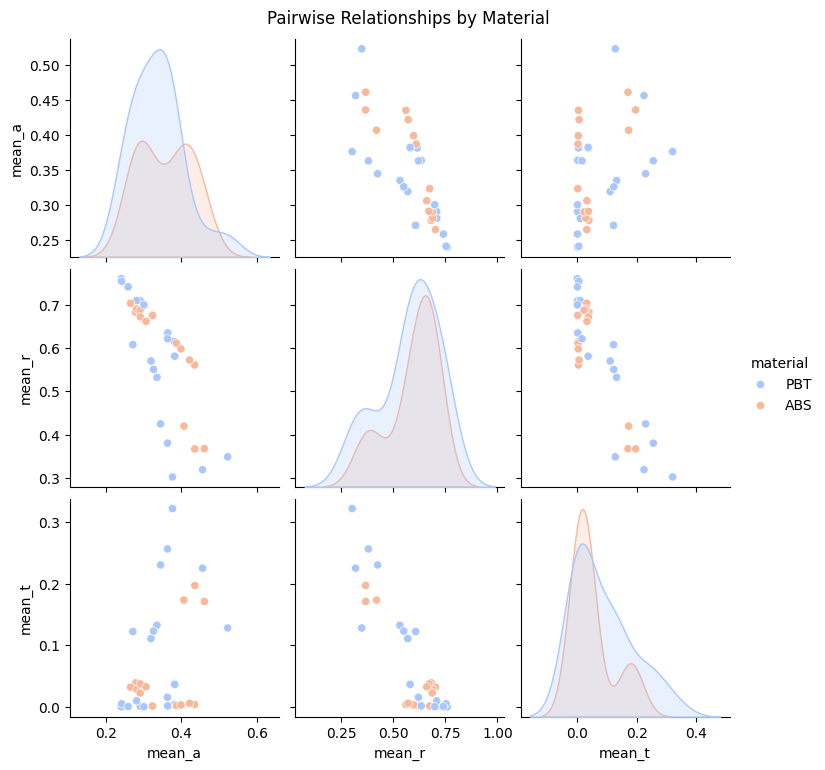

In [15]:
sns.pairplot(thesis_df, vars=['mean_a', 'mean_r', 'mean_t'], hue='material', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Material', y=1.02)
plt.show()


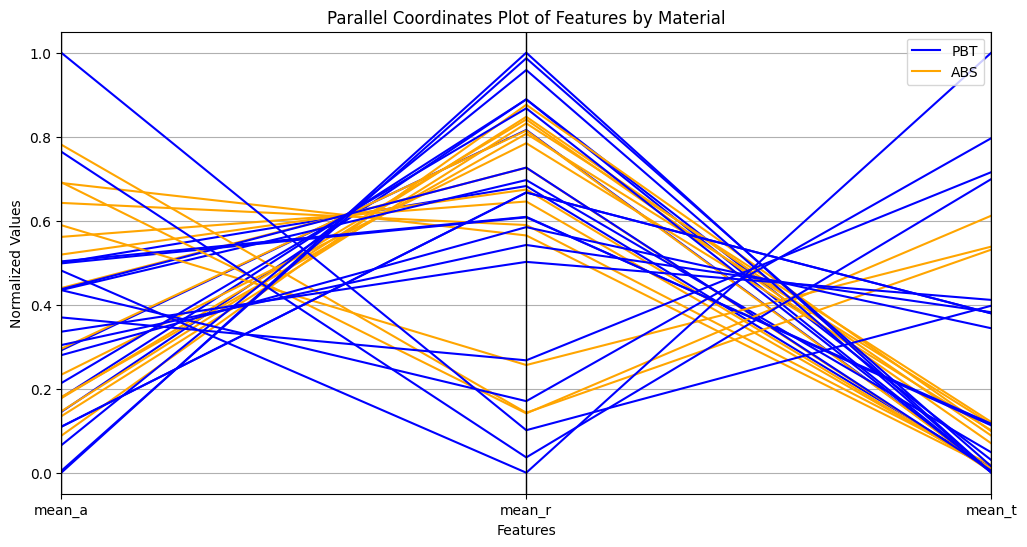

In [16]:
from pandas.plotting import parallel_coordinates

# Normalize features for better comparison
normalized_df = thesis_df.copy()
for col in ['mean_a', 'mean_r', 'mean_t']:
    normalized_df[col] = (normalized_df[col] - normalized_df[col].min()) / (normalized_df[col].max() - normalized_df[col].min())

plt.figure(figsize=(12, 6))
parallel_coordinates(normalized_df, class_column='material', cols=['mean_a', 'mean_r', 'mean_t'], color=['blue', 'orange'])
plt.title('Parallel Coordinates Plot of Features by Material')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.show()


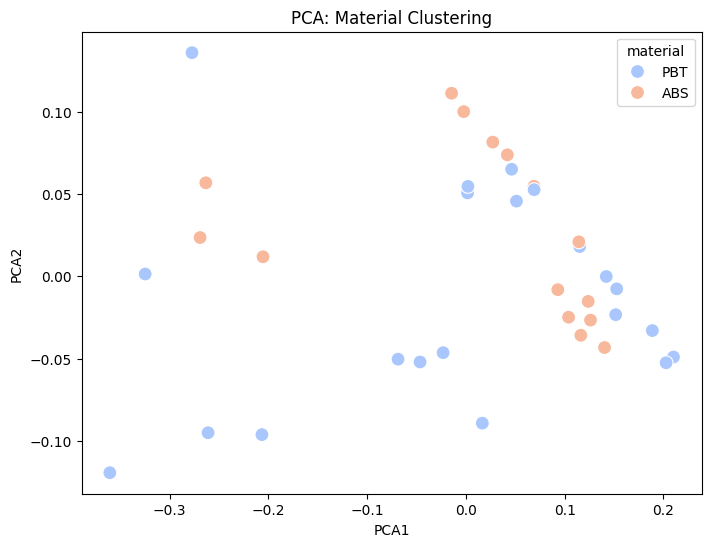

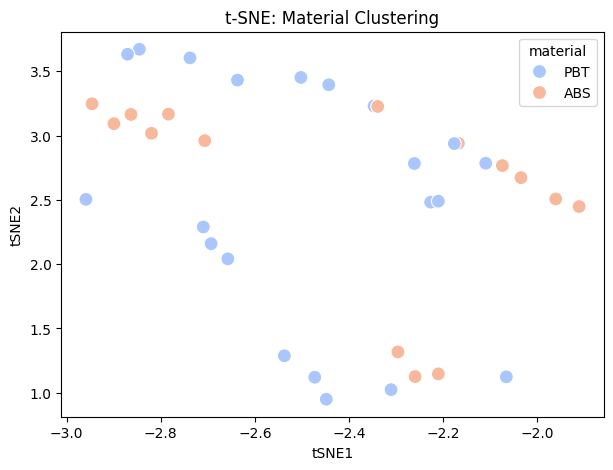

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Select numeric columns for dimensionality reduction
numeric_cols = ['mean_a', 'mean_r', 'mean_t', 'std_a', 'std_r', 'std_t']
data = thesis_df[numeric_cols].dropna()

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)
thesis_df['PCA1'], thesis_df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=thesis_df, x='PCA1', y='PCA2', hue='material', palette='coolwarm', s=100)
plt.title('PCA: Material Clustering')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)
thesis_df['tSNE1'], thesis_df['tSNE2'] = tsne_result[:, 0], tsne_result[:, 1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=thesis_df, x='tSNE1', y='tSNE2', hue='material', palette='coolwarm', s=100)
plt.title('t-SNE: Material Clustering')
plt.show()


ABS modalities

In [20]:
# Create subsets
quenched_compressed_ambient_files = [
    '3%-ABS-1.1mm-B-quenched',
    '3%-ABS-1.1mm-B-compressed',
    '3%-ABS-1.1mm-B-ambient',
    '3%-ABS-1.1mm-A-quenched',
    '3%-ABS-1.1mm-A-compressed',
    '3%-ABS-1.1mm-A-ambient'
]

abs_quenched_compressed = thesis_df[thesis_df['filename'].str.contains('|'.join(quenched_compressed_ambient_files))]
abs_other = thesis_df[(thesis_df['material'] == 'ABS') & (~thesis_df['filename'].str.contains('|'.join(quenched_compressed_ambient_files)))]


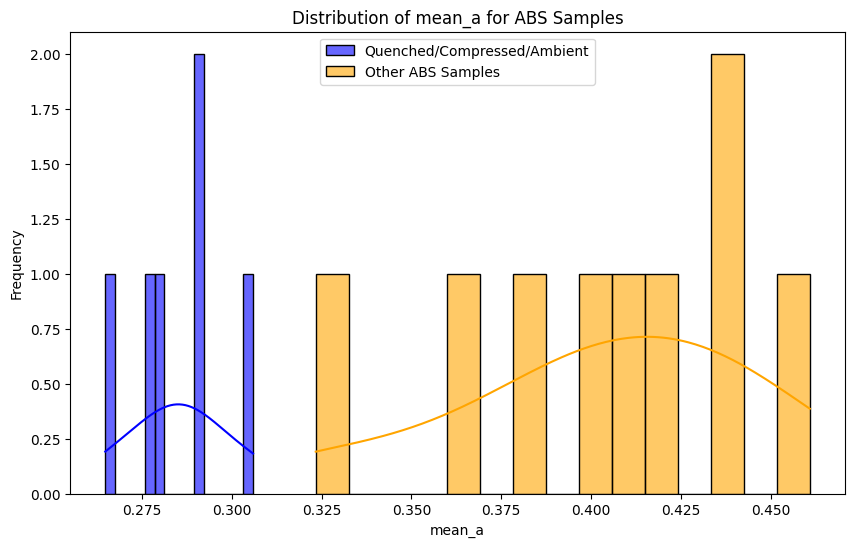

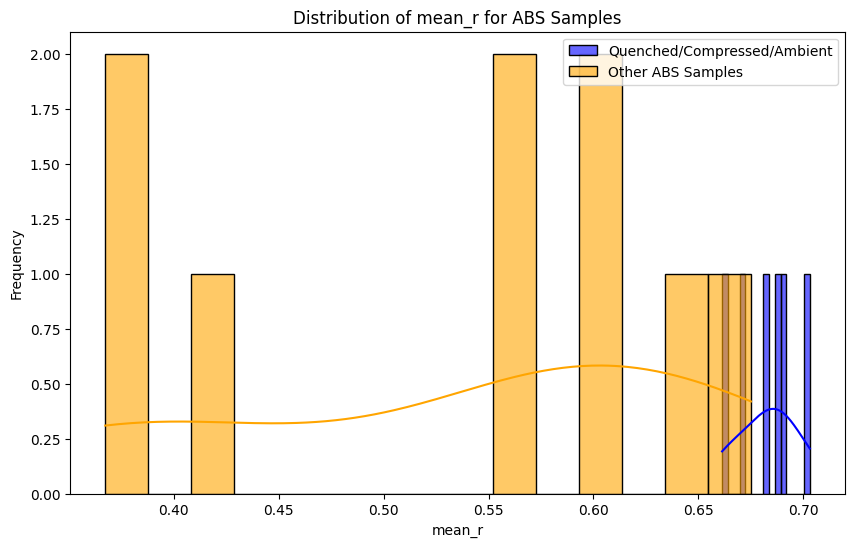

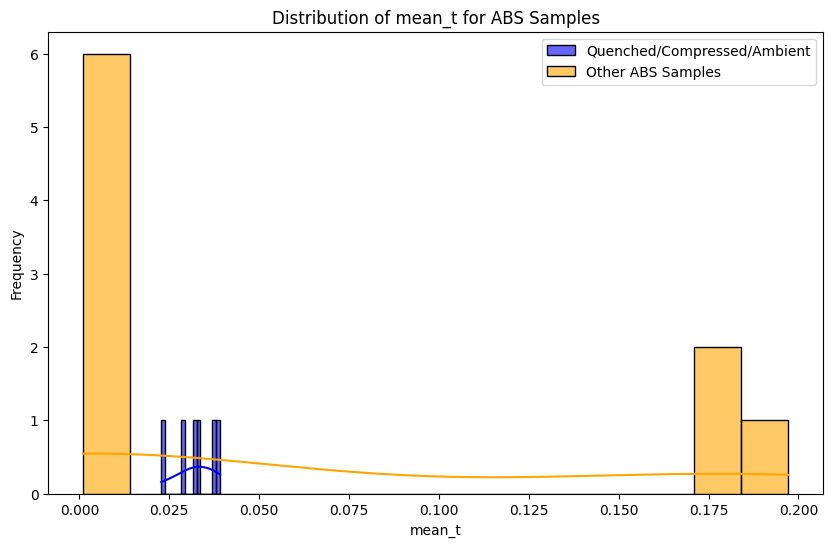

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histograms_with_kde(feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(abs_quenched_compressed[feature], kde=True, color='blue', label='Quenched/Compressed/Ambient', bins=15, alpha=0.6)
    sns.histplot(abs_other[feature], kde=True, color='orange', label='Other ABS Samples', bins=15, alpha=0.6)
    plt.title(f'Distribution of {feature} for ABS Samples')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot distributions
for feature in ['mean_a', 'mean_r', 'mean_t']:
    plot_histograms_with_kde(feature)


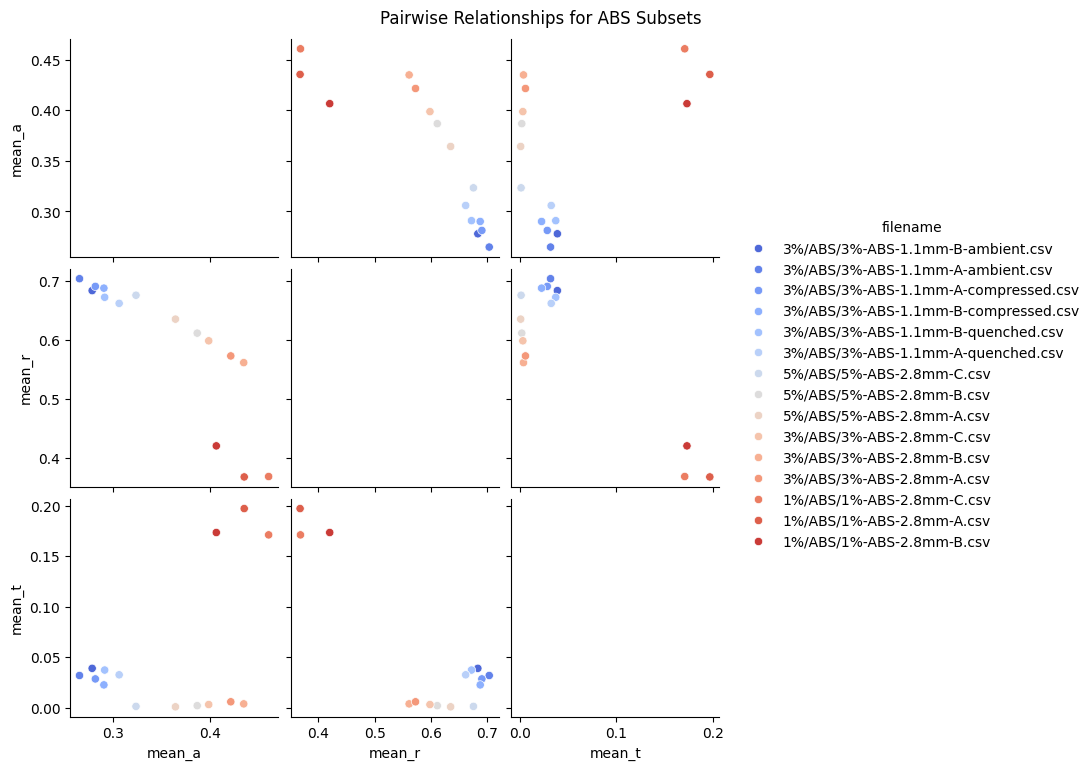

In [23]:
sns.pairplot(
    pd.concat([abs_quenched_compressed, abs_other]),
    vars=['mean_a', 'mean_r', 'mean_t'],
    hue='filename',
    palette='coolwarm',
    diag_kind='kde'
)
plt.suptitle('Pairwise Relationships for ABS Subsets', y=1.02)
plt.show()


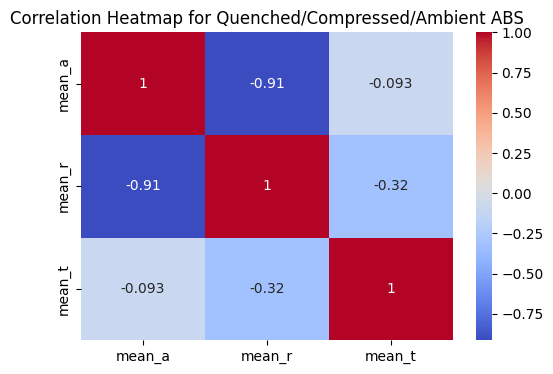

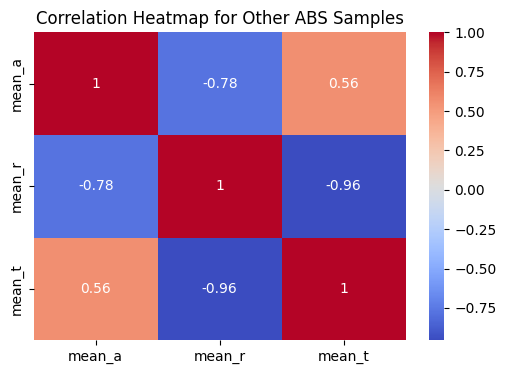

In [24]:
for subset, name in [(abs_quenched_compressed, 'Quenched/Compressed/Ambient ABS'), (abs_other, 'Other ABS Samples')]:
    corr_matrix = subset[['mean_a', 'mean_r', 'mean_t']].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
    plt.title(f'Correlation Heatmap for {name}')
    plt.show()
